In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression,Lasso
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

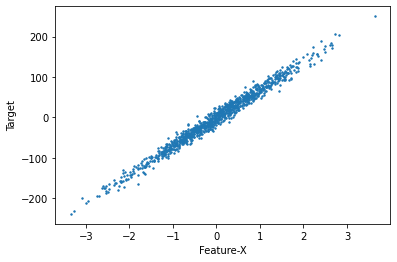

In [3]:
# load and visualize data from sklearn
# n_features means the dimensions of data instead of number
# X-2D array Y-list
X,Y = make_regression(n_features=1,noise = 10,n_samples=1000)
plt.xlabel("Feature-X")
plt.ylabel("Target")
plt.scatter(X,Y,s=2) # s equals the size of marker(here is blue dots)
plt.show()

In [4]:
# model
learner = LinearRegression()
learner.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The weight and the number of it is equal to the number of the dimension of data

In [5]:
learner.coef_ 

array([69.59604974])

In [6]:
learner.intercept_ # bias always one

-0.2743309880881992

In [7]:
pred = learner.predict(X) 

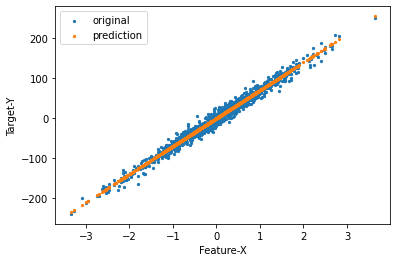

In [8]:
# visualize the result
plt.scatter(X,Y,s=5,label = "original")
plt.scatter(X,pred,s = 5,label = "prediction")
plt.xlabel("Feature-X")
plt.ylabel("Target-Y")
plt.legend() # make labels show inside
plt.show()

In [ ]:
ridge = Ridge(alpha = .1) # RidgeRegression
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
learner.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ridge.coef_

array([0.44186047, 0.44186047])

In [ ]:
learner.coef_

array([0.475, 0.475])

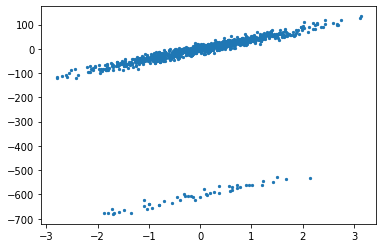

In [ ]:
# effect caused by outliers
outliers = Y[950:] - 600
Y_out = np.append(Y[:950],outliers)
plt.scatter(X,Y_out,s=5)
plt.show()

In [ ]:
learner.fit(X,Y_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_out = learner.predict(X)

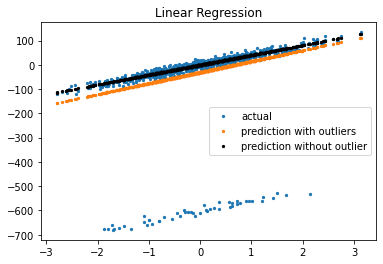

In [ ]:
plt.scatter(X,Y_out,s=5,label = "actual")
plt.scatter(X,pred_out,s=5,label = "prediction with outliers")
plt.scatter(X,pred,s=5,c="k",label = "prediction without outlier") # c-colors
plt.legend()
plt.title("Linear Regression")
plt.show()

In [ ]:
learner.coef_

array([45.30691889])

In [ ]:
ridge = Ridge(alpha=1000)
ridge.fit(X,Y_out)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred_ridge = ridge.predict(X)

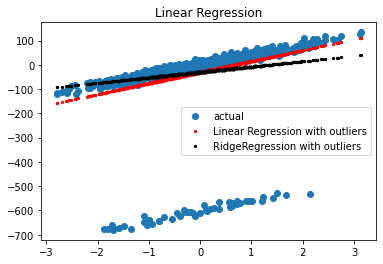

In [ ]:
plt.scatter(X,Y_out,label = "actual")
plt.scatter(X,pred_out,s=5,c = "r",label = "Linear Regression with outliers")
plt.scatter(X,pred_ridge,s=5,c="k",label = "RidgeRegression with outliers")
plt.legend()
plt.title("Linear Regression")
plt.show()

In [ ]:
ridge.coef_

array([22.32499265])

 **Effects of alpha using Ridge on 
Coeficients**


In [ ]:
# generate data
X,y,w = make_regression(n_samples=10,n_features=10,coef = True,random_state=1,bias = 3.5)

In [ ]:
w # weights

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

In [ ]:
# generate 20 alphas
alphas = np.logspace(-6,6,200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [ ]:
coefs = []
for a in alphas:
  ridge = Ridge(alpha = a,fit_intercept=False)
  ridge.fit(X,y)
  coefs.append(ridge.coef_)

Plot alphas and coefs

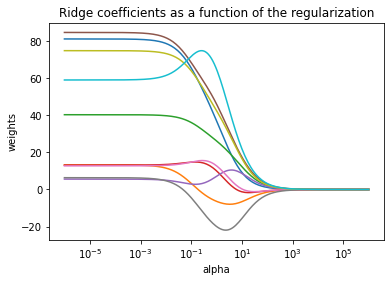

In [ ]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log") # e.g original data is 1.0e6 then it is transformed into 10^6 at axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.show()

Conlusion

1.   When alpha is quite small,which means regularization is not too strong,weights are big.In other words,they're almost the same as they're randomly sampled.
2.   However,when it comes to big alphas,weights are more likely to head towards zero.



Lasso



* Linear model that predict's sparse coefs
* Reduces the regressors predicting target




In [ ]:
lasso = Lasso(alpha=.1)
lasso.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([0.5, 0. ])

Elastic Net


*   Elastic Net can circumvent the problem that features aren't independent.While Lasso choose 1,ignoring the relationship between them,Elastic Net takes both.



In [ ]:
en = ElasticNet(alpha = .1)

In [ ]:
en.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
en.coef_

array([0.32589556, 0.32579954])

Logistic Regression

In [ ]:
# centers-number of piles of data(i.e. categories)
# cluster_std- every data's variance 
# e.g cluter_std = [1.0,3.0](We want second data to have bigger variance)
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=3,centers=2)

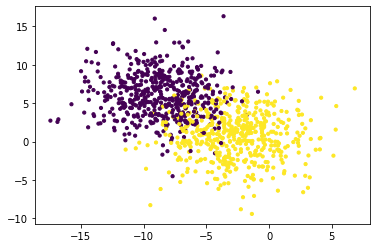

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

In [ ]:
Logistic_lr = LogisticRegression()
Logistic_lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
h = .02
x_min,x_max = X[:,0].min() - .5,X[:,0].max() + .5
y_min,y_max = X[:,1].min() - .5,X[:,1].max() + .5
# e.g. arange(1,8,1) -->[1,2,3,4,5,6,7]
# meshgrid e.g. meshgrid([1],[0]) --> array([[1]]),array([[0]]) 
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
print(xx.shape)
print(yy.shape)

(1337, 1263)
(1337, 1263)


In [ ]:
# ravel() the result of it is turn every vector into 1-dim
# e.g. [[1,2,3],[4,5,6]]-->[1,2,3,4,5,6]
# np.c_[c,d] concatenate c & d by rows
temp = np.c_[xx.ravel(),yy.ravel()]
Z = Logistic_lr.predict(temp)
Z.shape
temp.shape
# xx.ravel() --> 1040 * 1597 = 1660880

(1688631, 2)

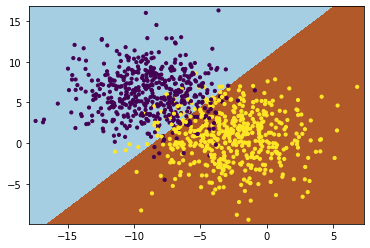

In [ ]:
Z = Z.reshape(xx.shape)
# category graphs three kinds-xx,yy,Z(line)
# cmap-automatically choose colors
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()


**Online Learning Models** 
* Stochastic Gradient Descent & Passive Aggrasive Algorithms
* Simple & Efficient to fit linear models
Useful where number of samples is very large ( Scale of 10^5 )
* Supports partial_fit for out-of-core learning
* Both the algorithms support regression & classification

In [ ]:
from sklearn.datasets import make_classification,make_regression

In [ ]:
X,y = make_classification(n_classes=2,n_features=10,n_samples=10000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX,testX,trainY,testY = train_test_split(X,y)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(n_iter_no_change=10)

In [ ]:
sgd.partial_fit(trainX[:1500],trainY[:1500],classes = [0,1])
sgd.score(testX,testY)

0.894

In [ ]:
sgd.partial_fit(trainX[1500:5000],trainY[1500:5000])
sgd.score(testX,testY)

0.8104


**Robust Regression**
* Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
* Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor


**Comparisions RANSAC, Theil Sen HuberRegressor**

* HuberRegressor should be faster than RANSAC
* Theil Sen and RANSAC are unlikely to be as robust as HuberRegressor for the default parameters.
* RANSAC will deal better with large outliers in the y direction
* RANSAC is faster than Theil Sen and scales much better with the number of samples
* RANSAC is a good default option

In [ ]:
n_samples = 1000
n_outliers = 50
X,y,coef = make_regression(n_samples=n_samples,n_features=1,n_informative=1,noise = 10,coef = True,random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size = (n_outliers,1))
y[:n_outliers] = -3 + 10 * np.random.normal(size = n_outliers)

In [ ]:
from sklearn.linear_model import LinearRegression,RANSACRegressor

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
ransac = RANSACRegressor()
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

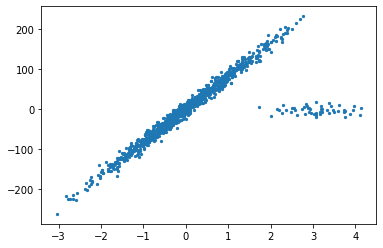

In [ ]:
plt.scatter(X,y,s=5)

In [ ]:
ransac_pred = ransac.predict(X)

In [ ]:
lr_pred = lr.predict(X)

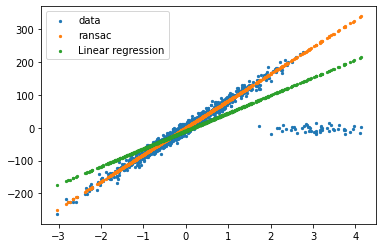

In [ ]:
plt.scatter(X,y,s=5,label = "data")
plt.scatter(X,ransac_pred,s=5,label = "ransac")
plt.scatter(X,lr_pred,s=5,label = "Linear regression")
plt.legend()
plt.show()

**Polynomial Regression**

* Sometimes relationship between variables & target is of higher polynomial degree
* Transformer can be used to convert data to higher degree
* Linear models can predict coef of these higher degree polynomials

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(n_samples=1000,noise = .04)

**Polynomial Basis intro**


Every row represents a dependent data point.

If feature-dimension is 2
- order = 1 -----> $[1,X_1,X_2]$
- order = 2 -----> $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2]$
- order = 3 -----> $[1,X_1,X_2,X_1 ^2,X_1X_2,X_2^2,X_1^3,X_1^2X_2,X_1X_2^2,X_2^3]$

If feature-dimension is 3
- order = 1 -----> $[1,X_1,X_2,X_3]$
- order = 2 -----> $[1,X_1,X_2,X_3,X_1^2,X_1X_2,X_1X_3,X_2^2,X_2X_3,X_3^2]$
- order = 3 -----> 
$[1,X_1,X_2,X_3,X_1^2,X_1X_2,X_1X_3,X_2^2,X_2X_3,X_3^2,X_1^3,X_1^2X_2,X_1^2X_3,X_1X_2^2,X_1X_2X_3,X_1X_3^2,X_2^3,X_2^2X_3,X_2X_3^2,X_3^3]$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
q = np.arange(6).reshape(3,2)
print(q)
poly_1 = PolynomialFeatures(degree=1)
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)
res_1 = poly_1.fit_transform(q)
res_2 = poly_2.fit_transform(q)
res_3 = poly_3.fit_transform(q)
print(res_1)
print(res_2)
print(res_3)

[[0 1]
 [2 3]
 [4 5]]
[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]]
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[  1.   0.   1.   0.   0.   1.   0.   0.   0.   1.]
 [  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


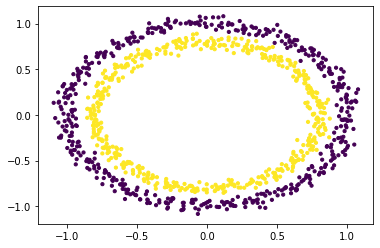

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pol = PolynomialFeatures(degree = 2)

In [ ]:
X_tf = pol.fit_transform(X)

In [ ]:
lr = LogisticRegression()

In [ ]:
trainX,testX,trainY,testY = train_test_split(X_tf,y)

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(testX,testY)

0.996

In [ ]:
lr.coef_

array([[-1.13886114e-04, -4.92207798e-02,  4.62984031e-02,
        -9.48481162e+00, -1.29156437e-01, -9.35699000e+00]])

 ***Bias Variance***

**Bias**
* Fitting training data poorly, but produce similar result outside training data
* we are building simple models that predicts terribly far from the reality but they don't change much from dataset to dataset.
* Situation of underfitting.
* a linear regression model would have high bias when trying to model a non-linear relationship.


**Variance**
* Building complex model that fits the training data well but many not work similar way of other dataset.
* Model is not generalized & is overfitting.


**Bias Variance TradeOff**
* Increasing the accuracy of the model will lead to less generalization of pattern outside training data.
* Increasing the bias will decrease the variance.
* Increasing the variance will decrease the bias.
* We have to get perfect balance of bias & variance




In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# generate 10000 points following y = 2x(-1,1) + 3 + 0.1 * n(0,1) 
def func(x,n):
    return 2 * x + 3 + 0.1 * n
n = np.random.rand(10000,1) # -->[0.,1)
X = -1 + 2 * np.random.rand(10000,1) # -->[0.,1)
y = func(X,n)

# if needed,try them

# print(X[:10])
# print(n[:10])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr_1 = lr.fit(X_train,y_train)

In [ ]:
y_pred = lr_1.predict(X_test)

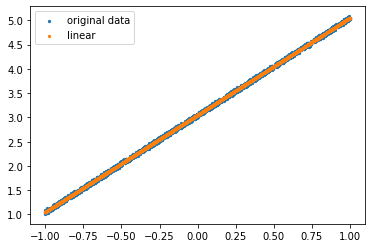

In [ ]:
plt.scatter(X_test,y_test,s=5,label = "original data")
plt.scatter(X_test,y_pred,s=5,label ="linear")
plt.legend()
plt.show()

In [ ]:
lr_1.score(X_test,y_test)

0.9993927418441865

In [ ]:
# weight
lr_1.coef_

array([[1.9991295]])

In [ ]:
# bias
lr_1.intercept_

array([3.05021312])

Generate 1000 points $y = 2x^2(-2,2) + 5 + N(0,1)$ 

In [ ]:
def func_square(x,n):
    return 2 * (x ** 2) + 5 + n

N = np.random.rand(10000,1)
X_ = np.random.rand(10000,1)
X_ = -2 + 4 * X_
y_ = func_square(X_,N)
# if needed,try them

# print(X_[:10])
# print(N[:10])
# print(y_[:10])

In [ ]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X_,y_,test_size = 0.2)

In [ ]:
lr2 = lr.fit(X_train_,y_train_)

In [ ]:
# Linear sucks
print(lr2.score(X_test_,y_test_))
y_pred_linear = lr.predict(X_test_)

-0.0009945453949153915


In [ ]:
# polynomial basis
# note we only transform x 
pol = PolynomialFeatures(degree=2)
X_train_3 = pol.fit_transform(X_train_)
X_test_3 = pol.fit_transform(X_test_)

In [ ]:
# 第一列为1，对结果无任何影响，故第一个coefficent为0
lr3 = lr.fit(X_train_3,y_train_)
lr3.coef_

array([[0.        , 0.00363362, 2.00456387]])

In [ ]:
print(lr3.score(X_test_3,y_test_))
y_pred = lr.predict(X_test_3)

0.9854533731382091


Lasso Regression

In [ ]:
# lasso do out-or-not job,arbitarily choose variable
la = Lasso().fit(X_train_3,y_train_)
la.coef_

array([ 0.        , -0.        ,  1.31312786])

In [ ]:
y_pred_lasso = la.predict(X_test_3)
la.score(X_test_3,y_test_)

0.8718388514745457

Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.8).fit(X_train_3,y_train_)
y_pred_ridge = ridge.predict(X_test_3)
print(ridge.score(X_test_3,y_test_))
ridge.coef_

0.9854544976588081


array([[0.        , 0.00363192, 2.00442527]])

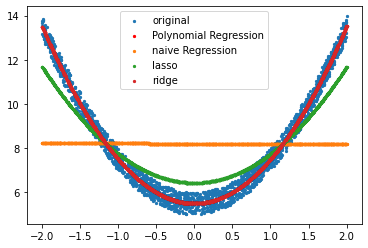

In [ ]:
plt.scatter(X_test_,y_test_,s=5,label = "original")
plt.scatter(X_test_,y_pred,s=5,c = "r",label = "Polynomial Regression")
plt.scatter(X_test_,y_pred_linear,s=5,label = "naive Regression")
plt.scatter(X_test_,y_pred_lasso,s=5,label="lasso")
plt.scatter(X_test_,y_pred_ridge,s=5,label = "ridge")
plt.legend()
plt.show()